In [142]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

- 거주지의 인구 구조 시각화를 통한 인구 현황 분석
- 인구증가율, 인구밀도 분석 및 도시화 현황 분석
- 사회, 경제, 정책, 건강 등 여러 분야에 적용할 수 있는 인사이트를 도출

# 1. 데이터 확인

In [146]:
df = pd.read_csv('대웅_example/판다스입문_codes/data/202309_202409_주민등록인구및세대현황_월간.csv', encoding='euc-kr')

In [148]:
df

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
0,전국 (1000000000),"51,370,001","23,900,917",2.15,"25,592,335","25,777,666",0.99,"51,354,226","23,901,564",2.15,...,2.13,"25,522,808","25,733,703",0.99,"51,248,233","24,102,045",2.13,"25,517,454","25,730,779",0.99
1,서울특별시 (1100000000),"9,407,540","4,475,726",2.10,"4,552,501","4,855,039",0.94,"9,400,249","4,472,603",2.10,...,2.08,"4,518,536","4,837,265",0.93,"9,350,995","4,487,671",2.08,"4,515,791","4,835,204",0.93
2,부산광역시 (2600000000),"3,300,836","1,565,115",2.11,"1,609,650","1,691,186",0.95,"3,298,213","1,564,546",2.11,...,2.09,"1,594,978","1,680,615",0.95,"3,273,473","1,570,953",2.08,"1,593,783","1,679,690",0.95
3,대구광역시 (2700000000),"2,377,801","1,092,536",2.18,"1,168,679","1,209,122",0.97,"2,376,978","1,092,922",2.17,...,2.15,"1,161,164","1,204,869",0.96,"2,365,523","1,102,902",2.14,"1,160,812","1,204,711",0.96
4,인천광역시 (2800000000),"2,987,918","1,344,029",2.22,"1,494,725","1,493,193",1.00,"2,990,276","1,345,719",2.22,...,2.20,"1,506,680","1,508,090",1.00,"3,016,520","1,370,309",2.20,"1,507,439","1,509,081",1.00
5,광주광역시 (2900000000),"1,422,999","656,061",2.17,"702,748","720,251",0.98,"1,421,760","655,675",2.17,...,2.15,"697,079","714,984",0.97,"1,411,357","658,210",2.14,"696,711","714,646",0.97
6,대전광역시 (3000000000),"1,444,595","680,653",2.12,"720,520","724,075",1.00,"1,443,965","680,363",2.12,...,2.10,"717,878","722,048",0.99,"1,440,456","687,909",2.09,"718,109","722,347",0.99
7,울산광역시 (3100000000),"1,104,167","489,298",2.26,"567,314","536,853",1.06,"1,104,031","489,851",2.25,...,2.22,"565,290","533,941",1.06,"1,098,728","494,664",2.22,"565,067","533,661",1.06
8,세종특별자치시 (3600000000),"385,932","160,479",2.40,"192,246","193,686",0.99,"386,079","160,556",2.40,...,2.39,"193,826","195,544",0.99,"389,443","162,952",2.39,"193,854","195,589",0.99
9,경기도 (4100000000),"13,626,339","5,969,573",2.28,"6,855,626","6,770,713",1.01,"13,627,840","5,971,803",2.28,...,2.26,"6,875,411","6,800,462",1.01,"13,680,645","6,045,219",2.26,"6,877,300","6,803,345",1.01


# 2. 데이터 탐색

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             19 non-null     object 
 1   2023년09월_총인구수    19 non-null     object 
 2   2023년09월_세대수     19 non-null     object 
 3   2023년09월_세대당 인구  19 non-null     float64
 4   2023년09월_남자 인구수  19 non-null     object 
 5   2023년09월_여자 인구수  19 non-null     object 
 6   2023년09월_남여 비율   19 non-null     float64
 7   2023년10월_총인구수    19 non-null     object 
 8   2023년10월_세대수     19 non-null     object 
 9   2023년10월_세대당 인구  19 non-null     float64
 10  2023년10월_남자 인구수  19 non-null     object 
 11  2023년10월_여자 인구수  19 non-null     object 
 12  2023년10월_남여 비율   19 non-null     float64
 13  2023년11월_총인구수    19 non-null     object 
 14  2023년11월_세대수     19 non-null     object 
 15  2023년11월_세대당 인구  19 non-null     float64
 16  2023년11월_남자 인구수  19 non-null     object 
 17  2023년11월_여자 인구수  1

In [153]:
df.shape

(19, 79)

In [155]:
df.index

RangeIndex(start=0, stop=19, step=1)

In [157]:
df.columns

Index(['행정구역', '2023년09월_총인구수', '2023년09월_세대수', '2023년09월_세대당 인구',
       '2023년09월_남자 인구수', '2023년09월_여자 인구수', '2023년09월_남여 비율', '2023년10월_총인구수',
       '2023년10월_세대수', '2023년10월_세대당 인구', '2023년10월_남자 인구수', '2023년10월_여자 인구수',
       '2023년10월_남여 비율', '2023년11월_총인구수', '2023년11월_세대수', '2023년11월_세대당 인구',
       '2023년11월_남자 인구수', '2023년11월_여자 인구수', '2023년11월_남여 비율', '2023년12월_총인구수',
       '2023년12월_세대수', '2023년12월_세대당 인구', '2023년12월_남자 인구수', '2023년12월_여자 인구수',
       '2023년12월_남여 비율', '2024년01월_총인구수', '2024년01월_세대수', '2024년01월_세대당 인구',
       '2024년01월_남자 인구수', '2024년01월_여자 인구수', '2024년01월_남여 비율', '2024년02월_총인구수',
       '2024년02월_세대수', '2024년02월_세대당 인구', '2024년02월_남자 인구수', '2024년02월_여자 인구수',
       '2024년02월_남여 비율', '2024년03월_총인구수', '2024년03월_세대수', '2024년03월_세대당 인구',
       '2024년03월_남자 인구수', '2024년03월_여자 인구수', '2024년03월_남여 비율', '2024년04월_총인구수',
       '2024년04월_세대수', '2024년04월_세대당 인구', '2024년04월_남자 인구수', '2024년04월_여자 인구수',
       '2024년04월_남여 비율', '2024년05월_총인구수', '2024년05월_세대수', '202

In [159]:
df.values

array([['전국  (1000000000)', '51,370,001', '23,900,917', ...,
        '25,517,454', '25,730,779', 0.99],
       ['서울특별시  (1100000000)', '9,407,540', '4,475,726', ...,
        '4,515,791', '4,835,204', 0.93],
       ['부산광역시  (2600000000)', '3,300,836', '1,565,115', ...,
        '1,593,783', '1,679,690', 0.95],
       ...,
       ['경상북도  (4700000000)', '2,559,924', '1,282,575', ..., '1,283,804',
        '1,254,151', 1.02],
       ['경상남도  (4800000000)', '3,257,009', '1,524,861', ..., '1,628,643',
        '1,603,654', 1.02],
       ['제주특별자치도  (5000000000)', '676,317', '313,265', ..., '335,717',
        '335,347', 1.0]], dtype=object)

In [161]:
df.isnull().sum()

행정구역               0
2023년09월_총인구수      0
2023년09월_세대수       0
2023년09월_세대당 인구    0
2023년09월_남자 인구수    0
                  ..
2024년09월_세대수       0
2024년09월_세대당 인구    0
2024년09월_남자 인구수    0
2024년09월_여자 인구수    0
2024년09월_남여 비율     0
Length: 79, dtype: int64

In [163]:
df.describe()

,2023년09월_세대당 인구,2023년09월_남여 비율,2023년10월_세대당 인구,2023년10월_남여 비율,2023년11월_세대당 인구,2023년11월_남여 비율,2023년12월_세대당 인구,2023년12월_남여 비율,2024년01월_세대당 인구,2024년01월_남여 비율,...,2024년05월_세대당 인구,2024년05월_남여 비율,2024년06월_세대당 인구,2024년06월_남여 비율,2024년07월_세대당 인구,2024년07월_남여 비율,2024년08월_세대당 인구,2024년08월_남여 비율,2024년09월_세대당 인구,2024년09월_남여 비율
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.022105,0.948421,2.020000,0.948947,2.020000,0.948947,2.019474,0.948421,2.017895,0.948947,...,2.004211,0.947895,2.004211,0.947895,2.003684,0.947895,2.000526,0.947368,1.996842,0.947368
std,0.500994,0.231571,0.500466,0.231778,0.500466,0.231778,0.500372,0.231667,0.499918,0.231778,...,0.497006,0.231818,0.497006,0.231818,0.496781,0.231818,0.496012,0.231753,0.495357,0.231753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.040000,0.985000,2.040000,0.985000,2.040000,0.985000,2.040000,0.985000,2.040000,0.985000,...,2.025000,0.985000,2.025000,0.985000,2.025000,0.985000,2.020000,0.980000,2.020000,0.980000
50%,2.120000,1.000000,2.120000,1.000000,2.120000,1.000000,2.120000,1.000000,2.120000,1.000000,...,2.100000,1.000000,2.100000,1.000000,2.100000,1.000000,2.100000,1.000000,2.090000,1.000000
75%,2.175000,1.015000,2.170000,1.015000,2.170000,1.015000,2.170000,1.015000,2.165000,1.015000,...,2.150000,1.020000,2.150000,1.020000,2.150000,1.020000,2.150000,1.020000,2.140000,1.020000
max,2.400000,1.060000,2.400000,1.060000,2.400000,1.060000,2.400000,1.060000,2.400000,1.060000,...,2.390000,1.060000,2.390000,1.060000,2.390000,1.060000,2.390000,1.060000,2.390000,1.060000


# 3. 데이터 전처리 수행

In [166]:
# 쉼표 제거 후 숫자형으로 변환
col_convert = [
    col for col in df.columns if any( # any() 함수는 하나라도 True인 경우 반환
        keyword in col for keyword in ['총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수'] # 각 열 이름이 키워드 목록중 포함되는지
    )
]

In [168]:
# 각 열의 값에서 ',' 제거 및 float 타입으로 변환
for col in col_convert:
    df[col] = df[col].replace(',', '', regex=True).astype(float)

In [170]:
# 컬럼명 정리(공백 제거 및 정리)
df.columns = df.columns.str.strip()

In [172]:
df.columns

Index(['행정구역', '2023년09월_총인구수', '2023년09월_세대수', '2023년09월_세대당 인구',
       '2023년09월_남자 인구수', '2023년09월_여자 인구수', '2023년09월_남여 비율', '2023년10월_총인구수',
       '2023년10월_세대수', '2023년10월_세대당 인구', '2023년10월_남자 인구수', '2023년10월_여자 인구수',
       '2023년10월_남여 비율', '2023년11월_총인구수', '2023년11월_세대수', '2023년11월_세대당 인구',
       '2023년11월_남자 인구수', '2023년11월_여자 인구수', '2023년11월_남여 비율', '2023년12월_총인구수',
       '2023년12월_세대수', '2023년12월_세대당 인구', '2023년12월_남자 인구수', '2023년12월_여자 인구수',
       '2023년12월_남여 비율', '2024년01월_총인구수', '2024년01월_세대수', '2024년01월_세대당 인구',
       '2024년01월_남자 인구수', '2024년01월_여자 인구수', '2024년01월_남여 비율', '2024년02월_총인구수',
       '2024년02월_세대수', '2024년02월_세대당 인구', '2024년02월_남자 인구수', '2024년02월_여자 인구수',
       '2024년02월_남여 비율', '2024년03월_총인구수', '2024년03월_세대수', '2024년03월_세대당 인구',
       '2024년03월_남자 인구수', '2024년03월_여자 인구수', '2024년03월_남여 비율', '2024년04월_총인구수',
       '2024년04월_세대수', '2024년04월_세대당 인구', '2024년04월_남자 인구수', '2024년04월_여자 인구수',
       '2024년04월_남여 비율', '2024년05월_총인구수', '2024년05월_세대수', '202

In [174]:
# 행정구역에서 괄호와 그 안의 숫자를 제거
df['행정구역'] = df['행정구역'].str.replace(r'\s*\(.*?\)', '', regex=True)

- regex = True는 정규 표현식을 사용할 수 있도록 하는 것
- r''은 정규 표현식으로 인식
- \s*는 공백이 있든 없든 괄호 앞의 공백을 포함해 제거
- \(와 \)는 각각 여는  괄호와 닫는 괄호를 의미
- .*?는 괄호 안에 있는 모든 문자를 의미하고, ?는 최소한 가능하게 문자를 선택
- ''은 찾은 내용을 삭제

In [177]:
# 세대수 대비 인구수 비율 계산
# data['세대수 대비 인구수'] = data['총인구수'] / data['세대수']
df

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
0,전국,51370001.0,23900917.0,2.15,25592335.0,25777666.0,0.99,51354226.0,23901564.0,2.15,...,2.13,25522808.0,25733703.0,0.99,51248233.0,24102045.0,2.13,25517454.0,25730779.0,0.99
1,서울특별시,9407540.0,4475726.0,2.10,4552501.0,4855039.0,0.94,9400249.0,4472603.0,2.10,...,2.08,4518536.0,4837265.0,0.93,9350995.0,4487671.0,2.08,4515791.0,4835204.0,0.93
2,부산광역시,3300836.0,1565115.0,2.11,1609650.0,1691186.0,0.95,3298213.0,1564546.0,2.11,...,2.09,1594978.0,1680615.0,0.95,3273473.0,1570953.0,2.08,1593783.0,1679690.0,0.95
3,대구광역시,2377801.0,1092536.0,2.18,1168679.0,1209122.0,0.97,2376978.0,1092922.0,2.17,...,2.15,1161164.0,1204869.0,0.96,2365523.0,1102902.0,2.14,1160812.0,1204711.0,0.96
4,인천광역시,2987918.0,1344029.0,2.22,1494725.0,1493193.0,1.00,2990276.0,1345719.0,2.22,...,2.20,1506680.0,1508090.0,1.00,3016520.0,1370309.0,2.20,1507439.0,1509081.0,1.00
5,광주광역시,1422999.0,656061.0,2.17,702748.0,720251.0,0.98,1421760.0,655675.0,2.17,...,2.15,697079.0,714984.0,0.97,1411357.0,658210.0,2.14,696711.0,714646.0,0.97
6,대전광역시,1444595.0,680653.0,2.12,720520.0,724075.0,1.00,1443965.0,680363.0,2.12,...,2.10,717878.0,722048.0,0.99,1440456.0,687909.0,2.09,718109.0,722347.0,0.99
7,울산광역시,1104167.0,489298.0,2.26,567314.0,536853.0,1.06,1104031.0,489851.0,2.25,...,2.22,565290.0,533941.0,1.06,1098728.0,494664.0,2.22,565067.0,533661.0,1.06
8,세종특별자치시,385932.0,160479.0,2.40,192246.0,193686.0,0.99,386079.0,160556.0,2.40,...,2.39,193826.0,195544.0,0.99,389443.0,162952.0,2.39,193854.0,195589.0,0.99
9,경기도,13626339.0,5969573.0,2.28,6855626.0,6770713.0,1.01,13627840.0,5971803.0,2.28,...,2.26,6875411.0,6800462.0,1.01,13680645.0,6045219.0,2.26,6877300.0,6803345.0,1.01


In [179]:
# 날짜별 열 분리 및 재구성 => 날짜별 데이터를 비교하기 쉽도록 열을 재구성하여 시간에 따른 변화를 파악
# 열 이름 변경: '2023년09월_총인구수' -> '2023_09_총인구수'
df.columns = [
    col.replace("년", "_").replace("월", "") if "년" in col else col
    for col in df.columns
]

In [181]:
# 전라북도가 전북특별자치도로 이름이 바껴서 데이터가 반이 있고, 반이 없는 현상을 보임
# 전라북도와 전북특별자치도의 데이터를 추출하여 합산
jeonbuk_data = df[df['행정구역'].isin(['전라북도', '전북특별자치도'])]

# 합산한 데이터 생성 (각 열을 합산하여 새로운 행 생성)
merge_row = jeonbuk_data.sum(numeric_only=True)
merge_row['행정구역'] = '전라북도합산'

# 기존 전라북도와 전북특별자치도 데이터를 삭제하고 합친 데이터를 추가
df = df[~df['행정구역'].isin(['전라북도', '전북특별자치도'])] # ~ 연산자는 논리 반전을 의미하며, True를 False로, False를 True로 바꿉니다
df = pd.concat([df, pd.DataFrame([merge_row])], ignore_index=True)

# 결과 확인
print(df[df['행정구역'] == '전라북도합산'])

      행정구역  2023_09_총인구수  2023_09_세대수  2023_09_세대당 인구  2023_09_남자 인구수  \
17  전라북도합산     1758661.0     861647.0            2.04        875353.0   

    2023_09_여자 인구수  2023_09_남여 비율  2023_10_총인구수  2023_10_세대수  2023_10_세대당 인구  \
17        883308.0           0.99     1757295.0     861451.0            2.04   

    ...  2024_08_세대당 인구  2024_08_남자 인구수  2024_08_여자 인구수  2024_08_남여 비율  \
17  ...            2.02        867993.0        875190.0           0.99   

    2024_09_총인구수  2024_09_세대수  2024_09_세대당 인구  2024_09_남자 인구수  2024_09_여자 인구수  \
17     1741640.0     864068.0            2.02        867235.0        874405.0   

    2024_09_남여 비율  
17           0.99  

[1 rows x 79 columns]


In [183]:
# df = df.drop(df.index[-1])
df

,행정구역,2023_09_총인구수,2023_09_세대수,2023_09_세대당 인구,2023_09_남자 인구수,2023_09_여자 인구수,2023_09_남여 비율,2023_10_총인구수,2023_10_세대수,2023_10_세대당 인구,...,2024_08_세대당 인구,2024_08_남자 인구수,2024_08_여자 인구수,2024_08_남여 비율,2024_09_총인구수,2024_09_세대수,2024_09_세대당 인구,2024_09_남자 인구수,2024_09_여자 인구수,2024_09_남여 비율
0,전국,51370001.0,23900917.0,2.15,25592335.0,25777666.0,0.99,51354226.0,23901564.0,2.15,...,2.13,25522808.0,25733703.0,0.99,51248233.0,24102045.0,2.13,25517454.0,25730779.0,0.99
1,서울특별시,9407540.0,4475726.0,2.10,4552501.0,4855039.0,0.94,9400249.0,4472603.0,2.10,...,2.08,4518536.0,4837265.0,0.93,9350995.0,4487671.0,2.08,4515791.0,4835204.0,0.93
2,부산광역시,3300836.0,1565115.0,2.11,1609650.0,1691186.0,0.95,3298213.0,1564546.0,2.11,...,2.09,1594978.0,1680615.0,0.95,3273473.0,1570953.0,2.08,1593783.0,1679690.0,0.95
3,대구광역시,2377801.0,1092536.0,2.18,1168679.0,1209122.0,0.97,2376978.0,1092922.0,2.17,...,2.15,1161164.0,1204869.0,0.96,2365523.0,1102902.0,2.14,1160812.0,1204711.0,0.96
4,인천광역시,2987918.0,1344029.0,2.22,1494725.0,1493193.0,1.00,2990276.0,1345719.0,2.22,...,2.20,1506680.0,1508090.0,1.00,3016520.0,1370309.0,2.20,1507439.0,1509081.0,1.00
5,광주광역시,1422999.0,656061.0,2.17,702748.0,720251.0,0.98,1421760.0,655675.0,2.17,...,2.15,697079.0,714984.0,0.97,1411357.0,658210.0,2.14,696711.0,714646.0,0.97
6,대전광역시,1444595.0,680653.0,2.12,720520.0,724075.0,1.00,1443965.0,680363.0,2.12,...,2.10,717878.0,722048.0,0.99,1440456.0,687909.0,2.09,718109.0,722347.0,0.99
7,울산광역시,1104167.0,489298.0,2.26,567314.0,536853.0,1.06,1104031.0,489851.0,2.25,...,2.22,565290.0,533941.0,1.06,1098728.0,494664.0,2.22,565067.0,533661.0,1.06
8,세종특별자치시,385932.0,160479.0,2.40,192246.0,193686.0,0.99,386079.0,160556.0,2.40,...,2.39,193826.0,195544.0,0.99,389443.0,162952.0,2.39,193854.0,195589.0,0.99
9,경기도,13626339.0,5969573.0,2.28,6855626.0,6770713.0,1.01,13627840.0,5971803.0,2.28,...,2.26,6875411.0,6800462.0,1.01,13680645.0,6045219.0,2.26,6877300.0,6803345.0,1.01


In [41]:
# 인구 비율 계산(2024년 9월의 인구수를 기준으로 지역별 인구 비율을 계산합니)
# df['인구증가율(1년)'] = ((df['2024_09_총인구수'] - df['2023_09_총인구수']) / df['2023_09_총인구수']) * 100

In [43]:
# df['인구증가율(1년)']

In [45]:
# 세대당 인구 변화율 (2023년 9월 ~ 2024년 9월)
# df['세대당 인구수 변화율'] = ((df['2024_09_세대당 인구'] - df['2023_09_세대당 인구']) / df['2023_09_세대당 인구']) * 100

In [47]:
# 성비 계산 (2024년 9월)
# df['2024_09_성비'] = df['2024_09_남자 인구수'] / df['2024_09_여자 인구수']

In [49]:
# 2024년 9월을 기준으로 지역별 인구 비율 계산
# total_population_2024_09 = df['2024_09_총인구수'].sum()
# df['2024_09_인구비율'] = (df['2024_09_총인구수'] / total_population_2024_09) * 100

In [51]:
# df.isnull().sum()

In [53]:
# df['2024_09_성비'] = df['2024_09_성비'].fillna(0)

In [55]:
# df.info()

In [57]:
# # 열 이름을 연도와 월, 항목별로 분리
# df = pd.melt(
#     df,
#     id_vars=['행정구역'], # 행정구역을 기준으로 melt 수행
#     var_name = '년도_월_항목', # 열 이름을 하나의 열로 변환
#     value_name='값' # 값 열 이름 지정
# )

# # var_name = '년도_월_항목'을 연도, 월, 항목으로 분리
# df [['년도','월','항목']] = df['년도_월_항목'].str.split('_', expand=True)

# # "년도", "월"을 숫자로 변환하여 정렬 가능하게 만듦
# df['년도'] = df['년도'].astype(int)
# df['월'] = df['월'].astype(int)

# # 필요 없는 열 제거
# df = df.drop(columns=["년도_월_항목"])

## 파생변수 생성

### 인구 비율 계싼

In [185]:
# 인구 비율 계산
# 2023년 9월과 2024년 9월의 총인구수 합계
total_2023_09 = df['2023_09_총인구수'].sum()
total_2024_09 = df['2024_09_총인구수'].sum()
# 각 연도의 지역별 인구 비율 계산
df['2023_09_인구비율'] = (df['2023_09_총인구수'] / total_2023_09) * 100
df['2024_09_인구비율'] = (df['2024_09_총인구수'] / total_2024_09) * 100
df['2024_09_인구비율']

0     50.000000
1      9.123237
2      3.193742
3      2.307907
4      2.943048
5      1.376981
6      1.405371
7      1.071967
8      0.379957
9     13.347431
10     1.483378
11     1.552110
12     2.083363
13     1.747861
14     2.476139
15     3.153569
16     0.654719
17     1.699220
Name: 2024_09_인구비율, dtype: float64

In [187]:
df.isnull().value_counts()

행정구역   2023_09_총인구수  2023_09_세대수  2023_09_세대당 인구  2023_09_남자 인구수  2023_09_여자 인구수  2023_09_남여 비율  2023_10_총인구수  2023_10_세대수  2023_10_세대당 인구  2023_10_남자 인구수  2023_10_여자 인구수  2023_10_남여 비율  2023_11_총인구수  2023_11_세대수  2023_11_세대당 인구  2023_11_남자 인구수  2023_11_여자 인구수  2023_11_남여 비율  2023_12_총인구수  2023_12_세대수  2023_12_세대당 인구  2023_12_남자 인구수  2023_12_여자 인구수  2023_12_남여 비율  2024_01_총인구수  2024_01_세대수  2024_01_세대당 인구  2024_01_남자 인구수  2024_01_여자 인구수  2024_01_남여 비율  2024_02_총인구수  2024_02_세대수  2024_02_세대당 인구  2024_02_남자 인구수  2024_02_여자 인구수  2024_02_남여 비율  2024_03_총인구수  2024_03_세대수  2024_03_세대당 인구  2024_03_남자 인구수  2024_03_여자 인구수  2024_03_남여 비율  2024_04_총인구수  2024_04_세대수  2024_04_세대당 인구  2024_04_남자 인구수  2024_04_여자 인구수  2024_04_남여 비율  2024_05_총인구수  2024_05_세대수  2024_05_세대당 인구  2024_05_남자 인구수  2024_05_여자 인구수  2024_05_남여 비율  2024_06_총인구수  2024_06_세대수  2024_06_세대당 인구  2024_06_남자 인구수  2024_06_여자 인구수  2024_06_남여 비율  2024_07_총인구수  2024_07_세대수  2024_07_세대당 인구  2024_07_남자 인구수  2024_07_여자 인구수  2024_07_남여 비율  202

In [ ]:
# 지역별 세대당 인구수 비교 (2024년 9월 기준)
processed_df[['행정구역', '2024_09_세대당 인구']]

In [ ]:
#인구증가율(연도별 인구수 변화추이)
# 2023년 9월 대비 2024년 9월 인구 증가율 계산
processed_df['인구증가율(1년)'] = ((processed_df['2024_09_총인구수'] - processed_df['2023_09_총인구수']) / processed_df['2023_09_총인구수']) * 100

# 인구 증가율 결과 확인
processed_df[['행정구역', '2023_09_총인구수', '2024_09_총인구수', '인구증가율(1년)']]

In [ ]:
# 연도별 세대당 인구수 변화추이
# 세대당 인구수 변화 추이 추출
household_population_trend = processed_df[['행정구역'] + [col for col in processed_df.columns if '세대당 인구' in col]]

# 세대당 인구수 변화 추이 확인
household_population_trend

In [ ]:
# 지역별 인구 변화 추이(도시화 현황)
# 지역별 인구 변화 추이 데이터 추출
population_trend = processed_df[['행정구역'] + [col for col in processed_df.columns if '총인구수' in col]]

# 인구 변화 추이 확인
population_trend

In [ ]:
# 연도별 성비 차이
# 연도별 성비 차이 데이터 추출
gender_ratio_trend = processed_df[['행정구역'] + [col for col in processed_df.columns if '남여 비율' in col]]

# 성비 차이 추이 확인
gender_ratio_trend

# 4. 시각화

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm

# # 사용 가능한 폰트 목록 출력
# for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(fm.FontProperties(fname=font).get_name())

# # 한글 폰트 설정
# plt.rcParams['font.family'] = 'Arial'
# # 마이너스 기호 깨짐 방지
# plt.rcParams['axes.unicode_minus'] = False

# # Gulim 폰트 경로를 직접 지정 (예: Windows의 경우)
# font_path = "C:/Windows/Fonts/gulim.ttc"  # 'gulim.ttc' 파일 경로 확인 후 설정
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['axes.unicode_minus'] = False

# sns.set(style='whitegrid')

In [193]:
# 사용할 한글 폰트 경로 (Windows: 'gulim.ttc' 또는 'Malgun Gothic', Mac: 'AppleGothic', Linux: 'NanumGothic')
font_path = "C:/Windows/Fonts/gulim.ttc"  # 경로 확인 후 변경
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
sns.set(style='whitegrid')

In [195]:
df.describe()

,2023_09_총인구수,2023_09_세대수,2023_09_세대당 인구,2023_09_남자 인구수,2023_09_여자 인구수,2023_09_남여 비율,2023_10_총인구수,2023_10_세대수,2023_10_세대당 인구,2023_10_남자 인구수,...,2024_08_여자 인구수,2024_08_남여 비율,2024_09_총인구수,2024_09_세대수,2024_09_세대당 인구,2024_09_남자 인구수,2024_09_여자 인구수,2024_09_남여 비율,2023_09_인구비율,2024_09_인구비율
count,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,...,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000,18.000000,18.000000
mean,5.707778e+06,2.655657e+06,2.134444,2.843593e+06,2.864185e+06,1.001111,5.706025e+06,2.655729e+06,2.132222,2.842530e+06,...,2.859300e+06,1.000000,5.694248e+06,2.678005e+06,2.107778,2.835273e+06,2.858975e+06,1.000000,5.555556,5.555556
std,1.185944e+07,5.501232e+06,0.108964,5.907207e+06,5.952489e+06,0.030465,1.185596e+07,5.501373e+06,0.108820,5.905056e+06,...,5.944327e+06,0.033781,1.183505e+07,5.547951e+06,0.110590,5.891530e+06,5.943801e+06,0.033781,11.543153,11.546789
min,3.859320e+05,1.604790e+05,1.980000,1.922460e+05,1.936860e+05,0.940000,3.860790e+05,1.605560e+05,1.980000,1.922990e+05,...,1.955440e+05,0.930000,3.894430e+05,1.629520e+05,1.960000,1.938540e+05,1.955890e+05,0.930000,0.375639,0.379957
25%,1.466124e+06,7.007155e+05,2.045000,7.329225e+05,7.332018e+05,0.990000,1.465349e+06,7.004362e+05,2.045000,7.325135e+05,...,7.305748e+05,0.990000,1.460444e+06,7.071828e+05,2.022500,7.297195e+05,7.307250e+05,0.990000,1.427024,1.424873
50%,1.967462e+06,9.722130e+05,2.130000,1.000347e+06,9.671155e+05,1.000000,1.967193e+06,9.724020e+05,2.125000,1.000320e+06,...,9.641270e+05,1.000000,1.963434e+06,9.813875e+05,2.095000,9.995305e+05,9.639040e+05,1.000000,1.914992,1.915612
75%,3.189736e+06,1.479653e+06,2.177500,1.580919e+06,1.586106e+06,1.017500,3.188998e+06,1.480067e+06,2.170000,1.580053e+06,...,1.580327e+06,1.020000,3.178353e+06,1.494860e+06,2.140000,1.572197e+06,1.580011e+06,1.020000,3.104668,3.100939
max,5.137000e+07,2.390092e+07,2.400000,2.559234e+07,2.577767e+07,1.060000,5.135423e+07,2.390156e+07,2.400000,2.558277e+07,...,2.573370e+07,1.060000,5.124823e+07,2.410204e+07,2.390000,2.551745e+07,2.573078e+07,1.060000,50.000000,50.000000


In [197]:
# y축 값 단위를 백만 단위로 설정하는 함수
def millions(x, pos):
    return f'{int(x / 1e6)}M'  # 백만(M)을 붙여서 표시

## 1. 2024년 9월 인구구조 현황

### 1.1 2023년 9월 / 2024년 9월의 인구 비율 

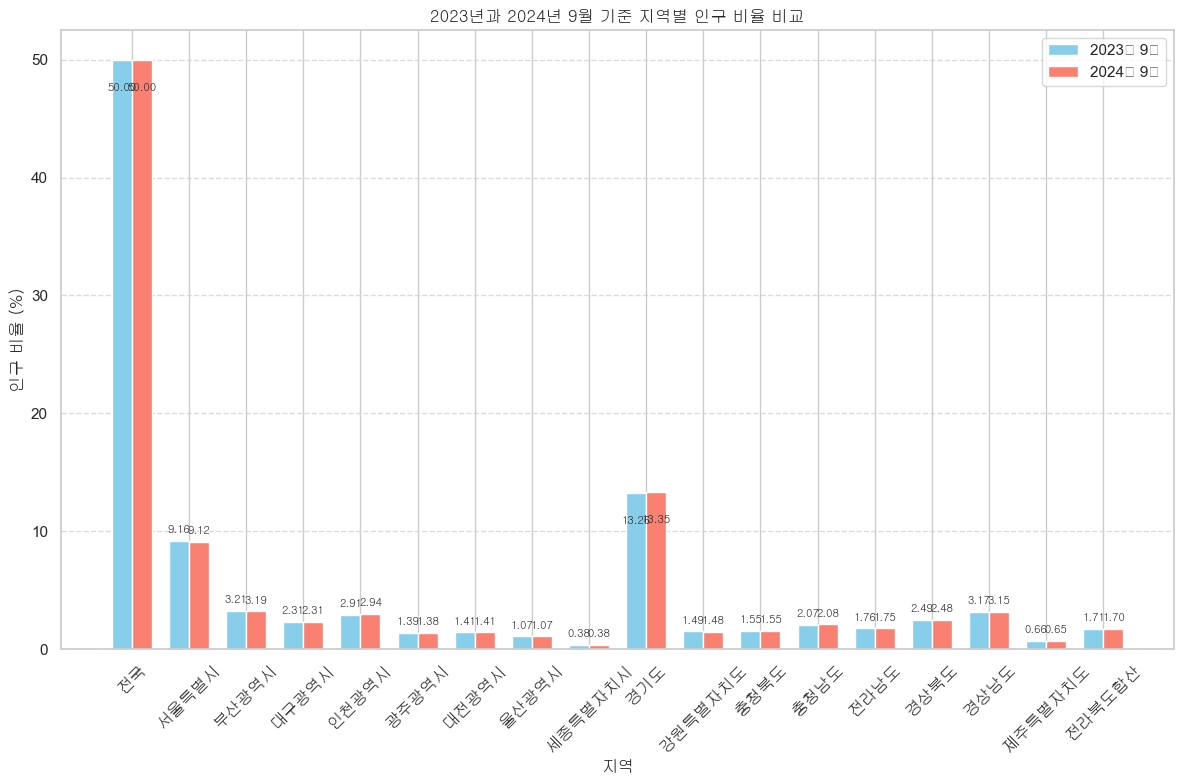

In [201]:
# 데이터 준비
regions = df['행정구역']
population_2023 = df['2023_09_인구비율']
population_2024 = df['2024_09_인구비율']

# 막대 위치 설정
x = np.arange(len(regions))  # 각 지역의 위치
width = 0.35  # 막대 폭

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - width/2, population_2023, width, label='2023년 9월', color='skyblue')
bar2 = ax.bar(x + width/2, population_2024, width, label='2024년 9월', color='salmon')

# 레이블 및 제목 설정
ax.set_xlabel('지역', fontproperties=font_prop)
ax.set_ylabel('인구 비율 (%)', fontproperties=font_prop)
ax.set_title('2023년과 2024년 9월 기준 지역별 인구 비율 비교', fontproperties=font_prop)
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, fontproperties=font_prop)
ax.legend()

# 2023년과 2024년 인구 비율 값 표시
# 주요 비율 값만 표시 (예: 5% 이상만 표시)
# 2023년과 2024년 인구 비율 값 표시
for bar in bar1:
    yval = bar.get_height()
    if yval > 10:
        ax.text(bar.get_x() + bar.get_width()/2, yval - 2, f'{yval:.2f}', ha='center', va='top', fontproperties=font_prop, fontsize=8)
    else:
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontproperties=font_prop, fontsize=8)

for bar in bar2:
    yval = bar.get_height()
    if yval > 10:
        ax.text(bar.get_x() + bar.get_width()/2, yval - 2, f'{yval:.2f}', ha='center', va='top', fontproperties=font_prop, fontsize=8)
    else:
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontproperties=font_prop, fontsize=8)

# 세로 그리드 선 추가
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.tight_layout()
plt.show()

In [203]:
print(df['행정구역'].unique())

['전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시'
 '경기도' '강원특별자치도' '충청북도' '충청남도' '전라남도' '경상북도' '경상남도' '제주특별자치도' '전라북도합산']


이 그래프는 2023년과 2024년 9월 기준 지역별 인구 비율 비교를 막대그래프로 나타낸 것이며,<br>
수도권 인구 비율이 압도적으로 높은 수치를 보이고 있고, 1년동안 전체적으로 큰 변화는 없지만, 지역별로 아주 미세한 인구 비율 면화가 보인다.

### 1.2 2024년 9월 성비

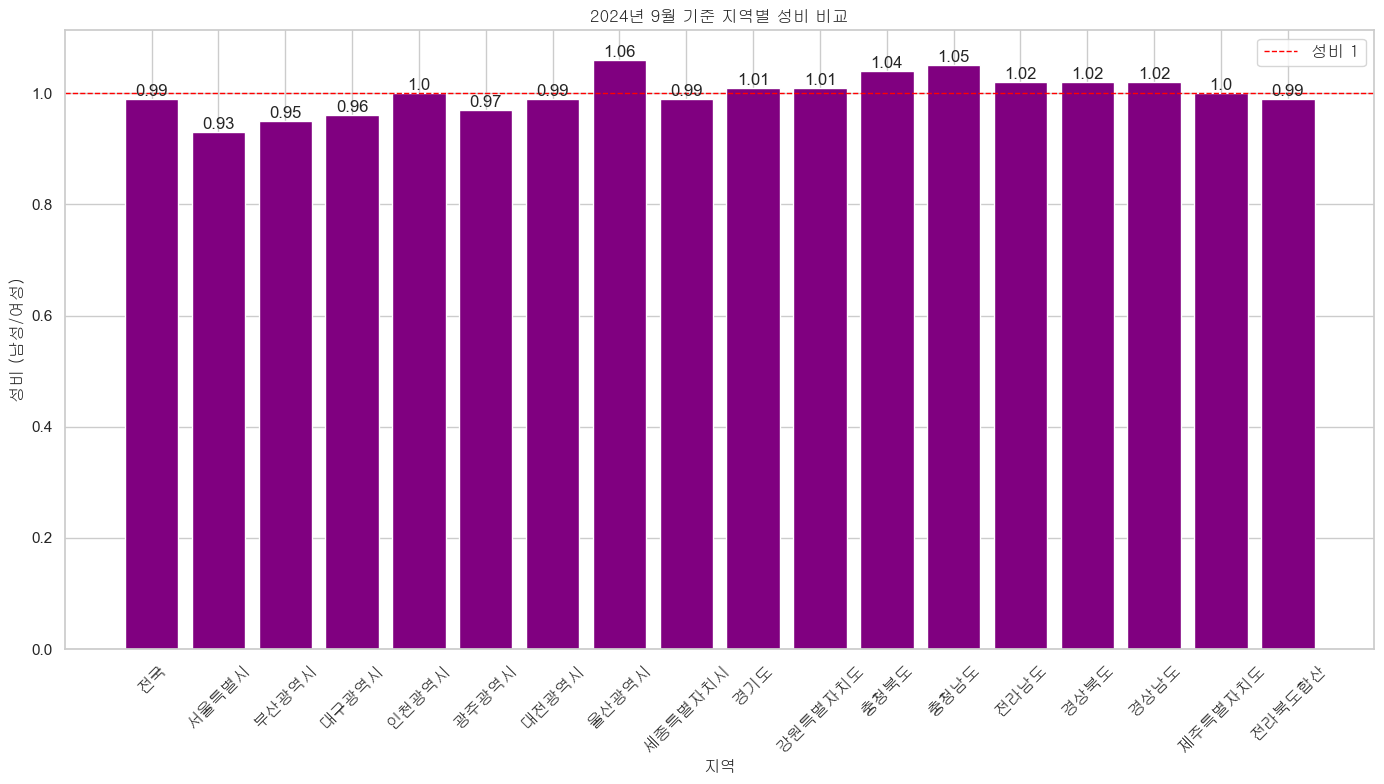

In [209]:
# 성비 계산 (남성 인구수 / 여성 인구수)
sex_ratio = df['2024_09_남여 비율']

# 그래프 생성
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(regions, sex_ratio, color='purple')

# 레이블 및 제목 설정
ax.set_xlabel('지역', fontproperties=font_prop)
ax.set_ylabel('성비 (남성/여성)', fontproperties=font_prop)
ax.set_title('2024년 9월 기준 지역별 성비 비교', fontproperties=font_prop)
ax.axhline(1, color='red', linestyle='--', linewidth=1, label='성비 1')
ax.set_xticklabels(regions, rotation=45, fontproperties=font_prop)
ax.legend(prop=font_prop)

# 성비 값 표시
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 그래프 출력
plt.tight_layout()
plt.show()

이 그래프는 2024년 지역별 성비를 나타내는 막대 그래프입니다.<br>
성비는 남성 인구수를 여성 인구수를 나눈 값입니다. 빨간색 점선(성비 1)을 기준으로 성비가 1에 가까운 값이면 남녀 인구가 균형을 이루고 있음을 나타낸다.<br>
1보다 높으면 남성 인구수가 높고, 낮으면 여성 인구수가 낮을 것을 알 수 있다.<br>
전체적으로 대부분 지역에서 남녀 인구가 균형을 이루고 있다.

### 1.3 2024년 9월 지역별 세대당 인구수 비교

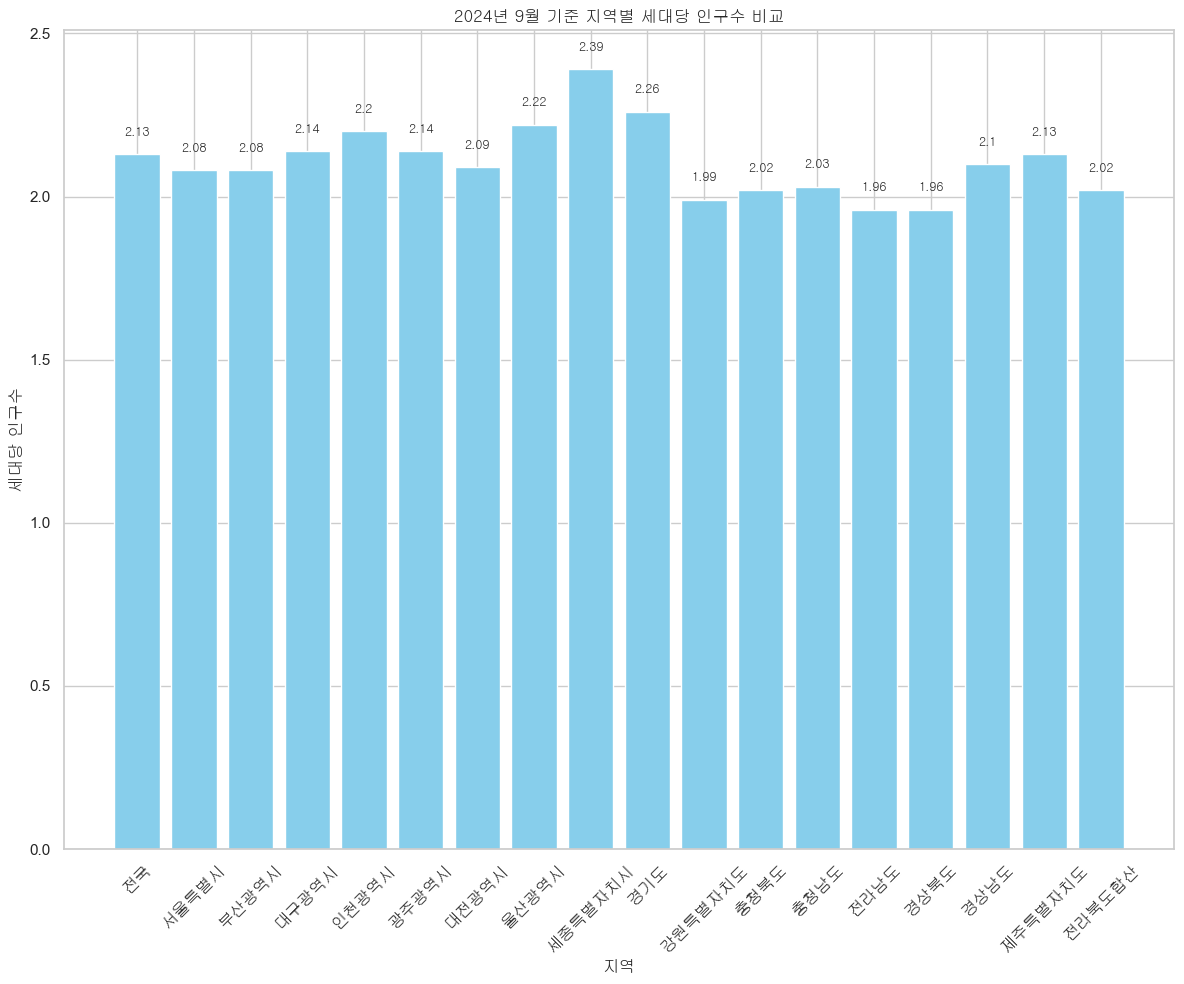

In [229]:
population_household = df['2024_09_세대당 인구']

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 10))
bars = ax.bar(regions, population_household, color='skyblue')

# 레이블 및 제목 설정
# fontproperties=font_prop => 그래프 한글이 깨짐을 방지
ax.set_xlabel('지역', fontproperties=font_prop)
ax.set_ylabel('세대당 인구수', fontproperties=font_prop)
ax.set_title('2024년 9월 기준 지역별 세대당 인구수 비교', fontproperties=font_prop)
ax.set_xticklabels(regions, rotation=45, fontproperties=font_prop)

# 세대당 인구수 값 표시
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontproperties=font_prop, fontsize=9)

# 그래프 출력
plt.tight_layout()
plt.show()

지역별 세대당 인구수를 보여주는 막대그래프이고, 세대당 평균 인구수를 비교하고 있다.<BR>
세대당 인구수는 지역 총 인구수에 세대 수를 나눈 값이다.<BR>
대부분의 지역에서 세대당 인구수는 비슷하고, 2명 내외로 결과를 확인할 수 있다.
대도시에서는 세대당 인구수가 약간 낮고, 일부 신도시나 중소도시(세종시 등)는 높은 세대당 인구수를 확인할 수 있다.

## 2. 2023년 9월 ~ 2024년 9월 변화추이

### 2. 인구증가율(연도별 총 인구수 변화추이)

In [281]:
from matplotlib.ticker import PercentFormatter
regions = df['행정구역']
# 연도별 인구수 열을 선택
years = []
for col in df.columns:
    if '총인구수' in col:
        years.append(col)

# 각 지역별 연도별 인구 증가율 계산
# 딕셔너리를 하는 이유 : 지역별 인구 증가율 데이터를 저장할 필요가 있다.
# 시계열 형태는 데이터의 접근과 계산을 편하게 하기 위해 1차원 배열로 변환한다.
growth_rate = {}
for region in regions:
    # 특정 지역의 연도별 인구수를 1차원 배열로 가져온다.
    popul = df.loc[df['행정구역']==region, years].values.flatten() # values는 선택된 데이터를 배열로 변환, flatten은 다차원 배열을 1차원 배열로 변
    
    # 인구 증가율 계산
    growth = []
    for i in range(len(popul)):
        # i
        if i == 0 :
             rate = 0  # 첫 연도의 증가율은 0으로 설정
        else:
            # (popul[i] - popul[i - 1])는 현재 연도와 이전 연도 인구 수의 차이를 의미한다. 이전 연도 인구 수로 나누어 비율을 계산하고, 100을 곱해 백분율(%)로 표시한다.
            rate = ((popul[i] - popul[i - 1]) / popul[i - 1]) * 100 # popul[i]: 현재 연도의 인구수, popul[i-1]: 이전 연도의 인구 수
        growth.append(rate)

    # 지역별 증가율 리스트 growth_rate에 저장
    growth_rate[region] = growth

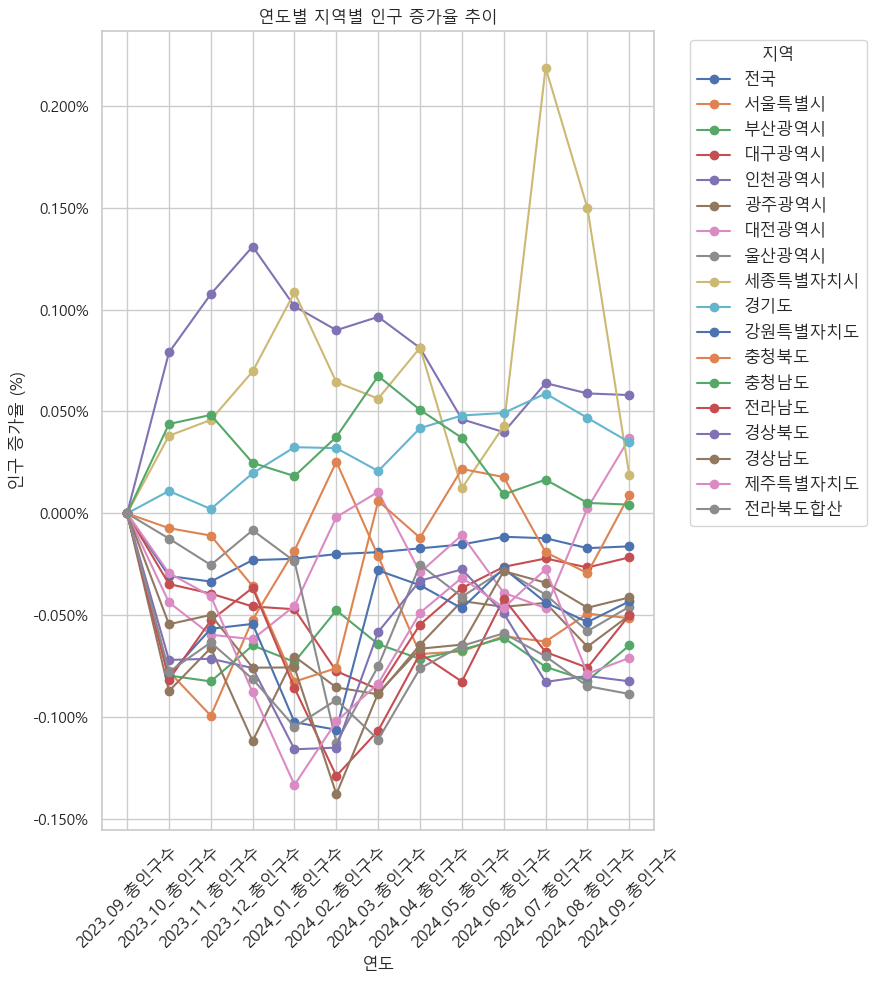

In [308]:
# 그래프 생성
fig, ax = plt.subplots(figsize=(9, 10))

# 각 지역의 연도별 인구 증가율을 선 그래프로 표시
for region, rate in growth_rate.items():
    ax.plot(years, rate, marker='o', label=region)
    # # y값 표시
    # for x, y in zip(years, rate):
    #     ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)

# 레이블 및 제목 설정
ax.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('연도', fontproperties=font_prop)
ax.set_ylabel('인구 증가율 (%)', fontproperties=font_prop)
ax.set_title('연도별 지역별 인구 증가율 추이', fontproperties=font_prop)
# 자욕 그래프 밖으로 배치
ax.legend(title='지역', prop=font_prop, bbox_to_anchor=(1.05, 1), loc='upper left')
# y축을 퍼센트로 설정
ax.yaxis.set_major_formatter(PercentFormatter())

# 그래프 출력
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()

plt.show()

각 지역별 2023년 9월 ~ 2024년 9월의 총 인구 증가율을 나타낸 선 그래프다.<br>
y축은 인구 증가율을 백분율로 나타내며, 2023년 9월을 0%으로 시작해서 인구 증가율을 비교할 수 있다.
인구 증가율은 -0.15%에서 0.22% 사이에 분포하고 있고, 0%에 근접한 증가율을 기록하는 경우가 많아, 전반적으로 인구 증가율이 안정적이지만 일부 지역에서 증가 또는 감소가 나타나는 것을 볼 수 있다.<br>
이렇게 보면 구별하기 힘들어 각 지역별 평균 증가율을 계산하여 큰 변동을 보이는 상위 5개 지역만 선택해서 아래 같이 그래프를 구성했다.

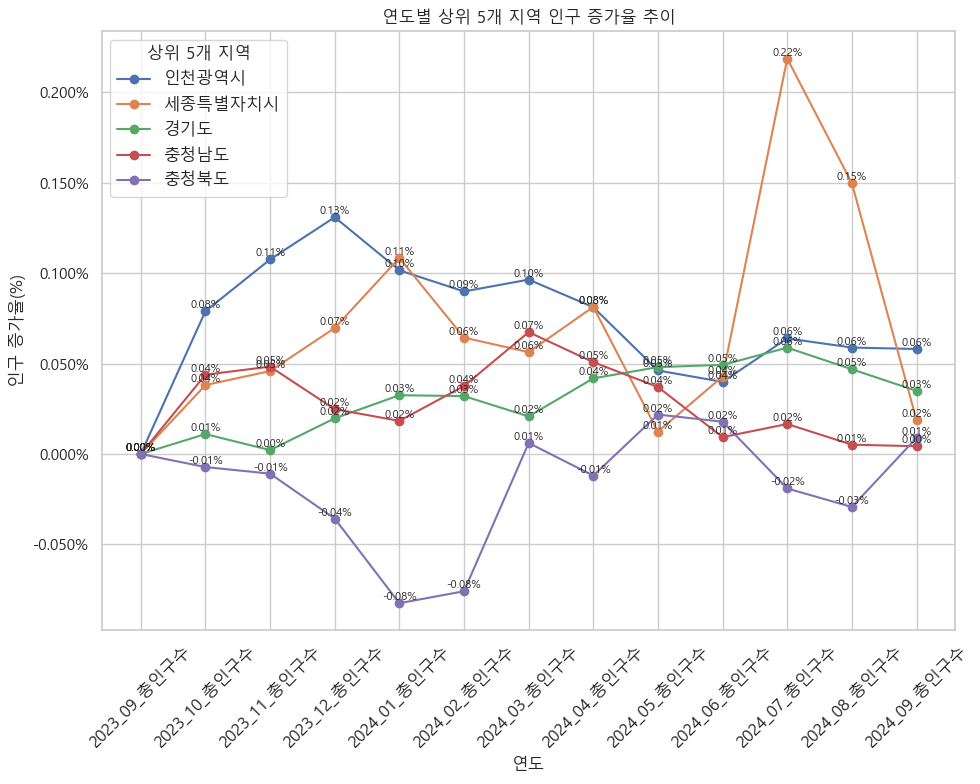

In [313]:
# 각 지역의 평균 인구 증가율 계산
avg_growth_region = {}
for region, growth in growth_rate.items():
    avg_growth_region[region] = np.mean(growth)

# 상위 5개 지역 선택 (평균 인구 증가율이 높은 순으로 정렬)
top_regions = sorted(avg_growth_region, key=avg_growth_region.get, reverse=True)[:5]
top_growth_rate = {}
for region in top_regions:
    top_growth_rate[region] = growth_rate[region]

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 각 상위 지역의 연도별 인구 증가율을 선 그래프로 표시
for i, (region, rate) in enumerate(top_growth_rate.items()):
    line = ax.plot(years, rate, marker='o', label=region)
    # 각 데이터 포인트 위에 값 표시
    for x, y in zip(years, rate):
        ax.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=8, fontproperties=font_prop)

# y축을 퍼센트로 설정
ax.yaxis.set_major_formatter(PercentFormatter())

# 레이블 및 제목 설정
ax.set_xlabel('연도', fontproperties=font_prop)
ax.set_ylabel('인구 증가율(%)', fontproperties=font_prop)
ax.set_title('연도별 상위 5개 지역 인구 증가율 추이', fontproperties=font_prop)

# 범례 추가
ax.legend(title='상위 5개 지역', prop=font_prop, loc='upper left')

# x축 레이블 회전
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

### 세대당 인구수 분포

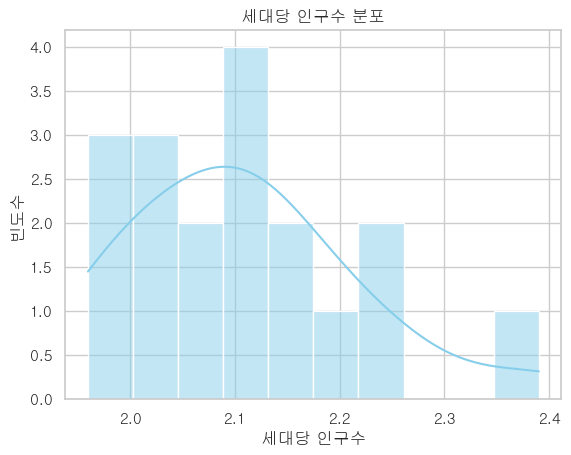

In [242]:
# 세대당 인구수 분포 히스토그램
sns.histplot(data=df['2024년09월_세대당 인구'], bins=10, color='skyblue', kde=True)
plt.xlabel('세대당 인구수')
plt.ylabel('빈도수')
plt.title('세대당 인구수 분포')
plt.show()

이 분포를 통해 일반적인 가족 구성의 크기를 추정할 수 있다.
세대당 인구수 평균은 약 2.1명에 위치. 전체적으로 세대당 인구수의 변동폭이 크지 않은데 2.3 이상인 곳은 큰 가족을 구성을 한다는 뜻인데 상대적으로 적다.

### 총 인구수 분포

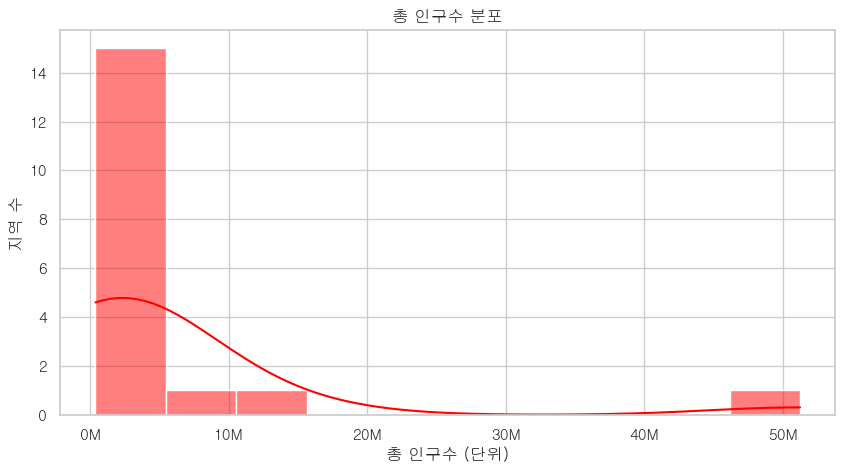

In [244]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['2024년09월_총인구수'], bins=10, color='red', kde=True)
plt.xlabel('총 인구수 (단위)')
plt.ylabel('지역 수')
plt.title('총 인구수 분포')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

인구 규모가 작은 지역과 큰 지역이 얼마나 있는지, 인구가 어떻게 분포되어 있는지 알 수 있다.<br>
대부분의 지역은 인구수가 낮고 소수의 지역만 인구가 많다는 것을 알 수 있다.<br>
결국, 인구가 특정 지역에 도시 집중화 현상을 알 수 있으며, 대도시와 나머지 지역의 인구 격차가 크다는 것을 의미.

## 막대그래프

### 지역별 총 인구수

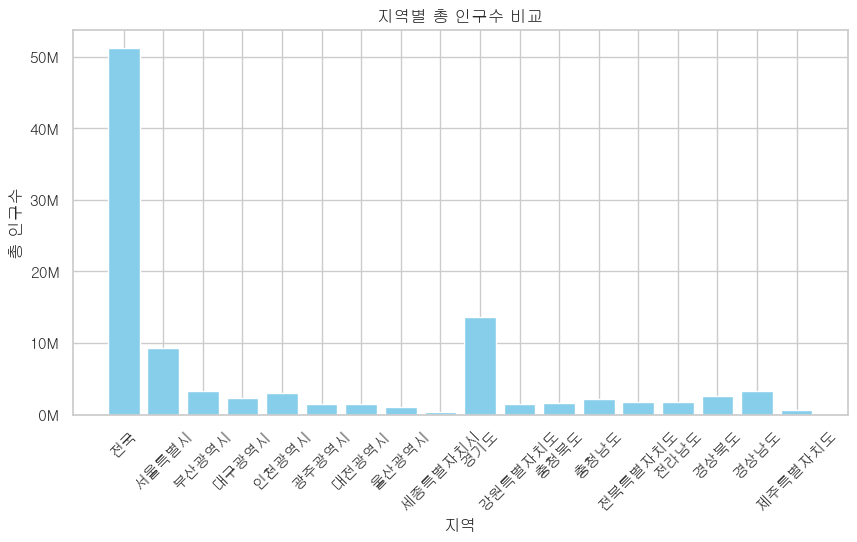

In [268]:
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_총인구수'], color='skyblue')
plt.xlabel('지역')
plt.ylabel('총 인구수')
plt.title('지역별 총 인구수 비교')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

각 지역의 총 인구수를 막대그래프를 이용해 어느 지역에 인구가 많이 집중되어 있는지 알 수 있다.

### 지역별 세대수

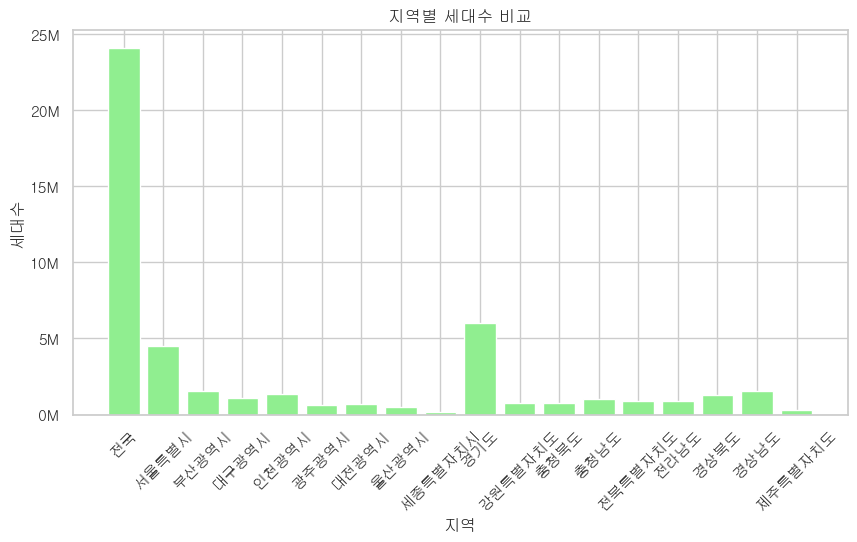

In [280]:
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_세대수'], color='lightgreen')
plt.xlabel('지역')
plt.ylabel('세대수')
plt.title('지역별 세대수 비교')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

지역마다 세대수를 비교하여 가구 수가 많은 지역과 적은 지역을 확인할 수 있다.

### 지역별 세대수 대비 인구수

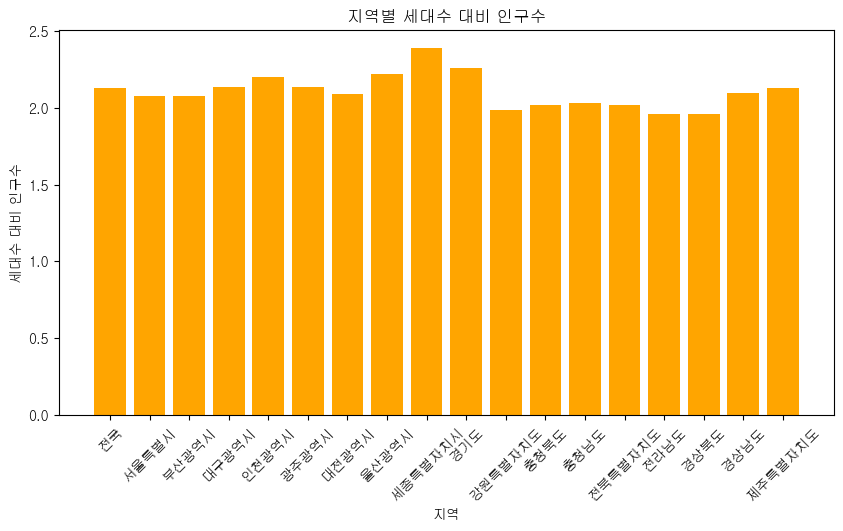

In [180]:
# 지역별 세대수 대비 인구수
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_세대당 인구'], color='orange')
plt.xlabel('지역')
plt.ylabel('세대수 대비 인구수')
plt.title('지역별 세대수 대비 인구수')
plt.xticks(rotation=45)
plt.show()

지역별 세대당 인구수를 보여주는 막대그래프이고, 세대당 평균 인구수를 비교하고 있다.<br>
대부분의 지역에서 세대당 인구수는 비슷하고, 2명 내외로 결과를 확인할 수 있다.<br>
대도시에서는 세대당 인구수가 약간 낮고, 일부 신도시나 중소도시(세종시 등)는 높은 세대당 인구수를 확인할 수 있다.

### 지역별 남녀 인구수 비율

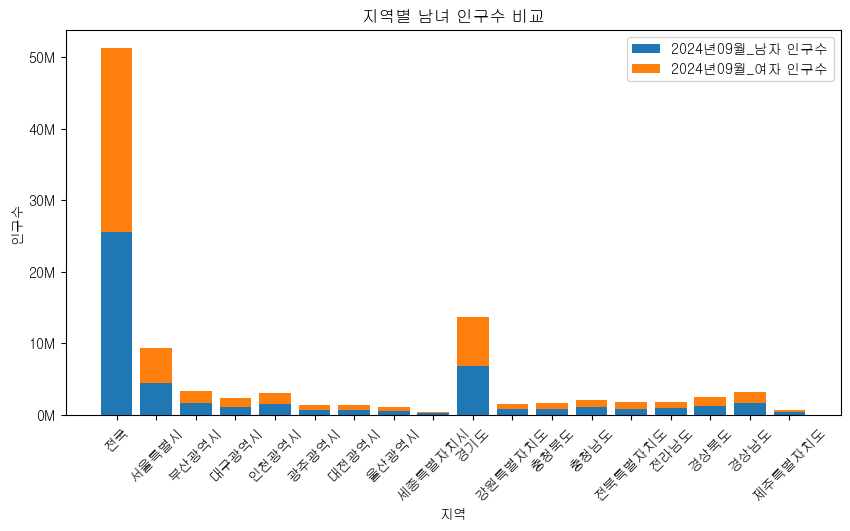

In [177]:
# y축 값 단위를 백만 단위로 설정하는 함수
def millions(x, pos):
    return f'{int(x / 1e6)}M'  # 백만(M)을 붙여서 표시

# 지역별 남녀 인구수 비율 비교 그래프
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_남자 인구수'], label='2024년09월_남자 인구수')
plt.bar(df['행정구역'], df['2024년09월_여자 인구수'], bottom=df['2024년09월_남자 인구수'], label='2024년09월_여자 인구수')
plt.xlabel('지역')
plt.ylabel('인구수')
plt.title('지역별 남녀 인구수 비교')
plt.xticks(rotation=45)
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

전국 인구가 특정 대도시에 집중되어 있다. 서울, 부산, 경기도, 인천 등에 인구가 많이 분포되어 있다.
남녀 비율은 모든 지역에서 비율이 비슷한 분포를 보인다.

### 지역별 남녀 비율

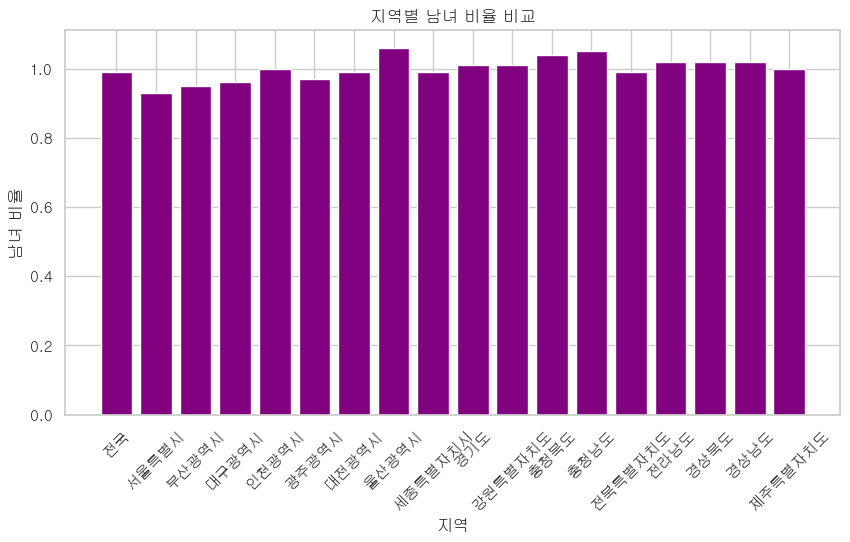

In [285]:
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_남여 비율'], color='purple')
plt.xlabel('지역')
plt.ylabel('남녀 비율')
plt.title('지역별 남녀 비율 비교')
plt.xticks(rotation=45)
plt.show()

지역별 남녀 비율을 보여주는 막대그래프로, 각 지역별 남녀 비율을 비교하고 있다. 여기서 남녀 비율은 일반적으로 남성 인구수를 여성 인구수로 나눈 값이다. 이 값이 1에 가까울수록 남녀 인구가 균형을 이룬다.<br>
대부분의 지역에서 남녀 비율이 균형을 이루고 있어, 성비 불균형이 나타나지 않는다.<br>

## HeatMap

In [295]:
# 주요 변수들만 선택하여 히트맵에 사용할 데이터 준비
heatmap_df = df.set_index('행정구역')[['2024년09월_총인구수', '2024년09월_남자 인구수', 
                                                '2024년09월_여자 인구수', '2024년09월_세대수', 
                                                '2024년09월_세대당 인구', '2024년09월_남여 비율']]

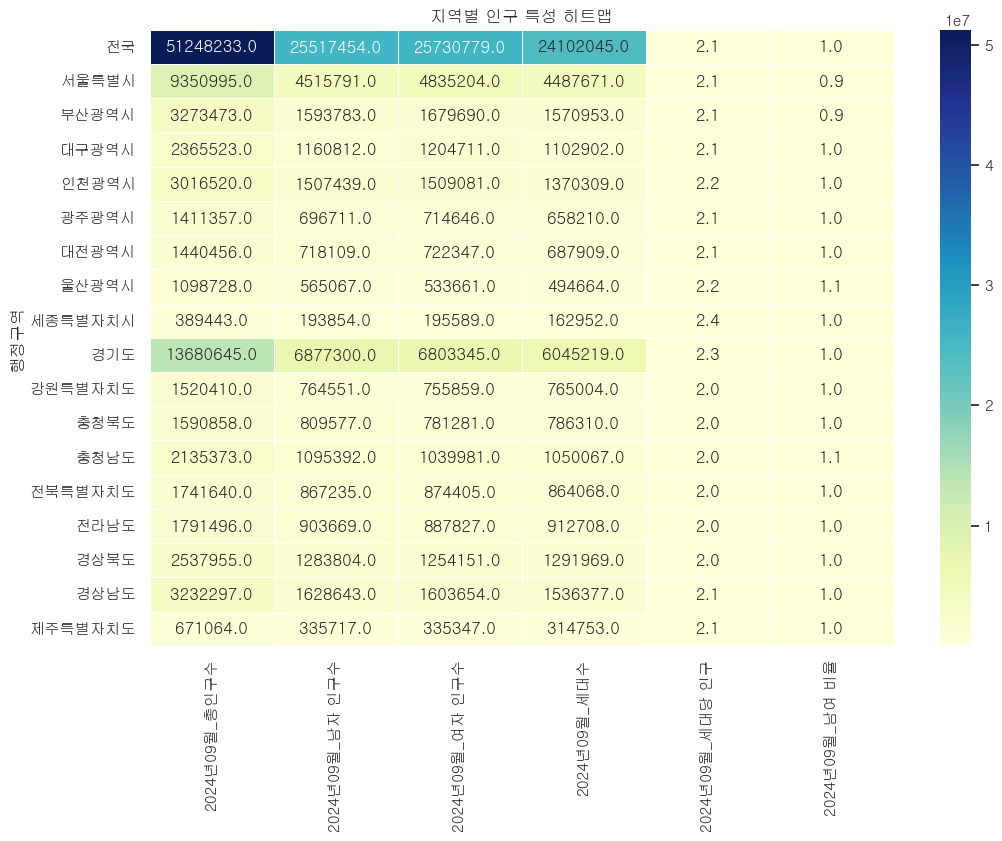

In [301]:
# 전처리한 데이터 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('지역별 인구 특성 히트맵')
plt.show()

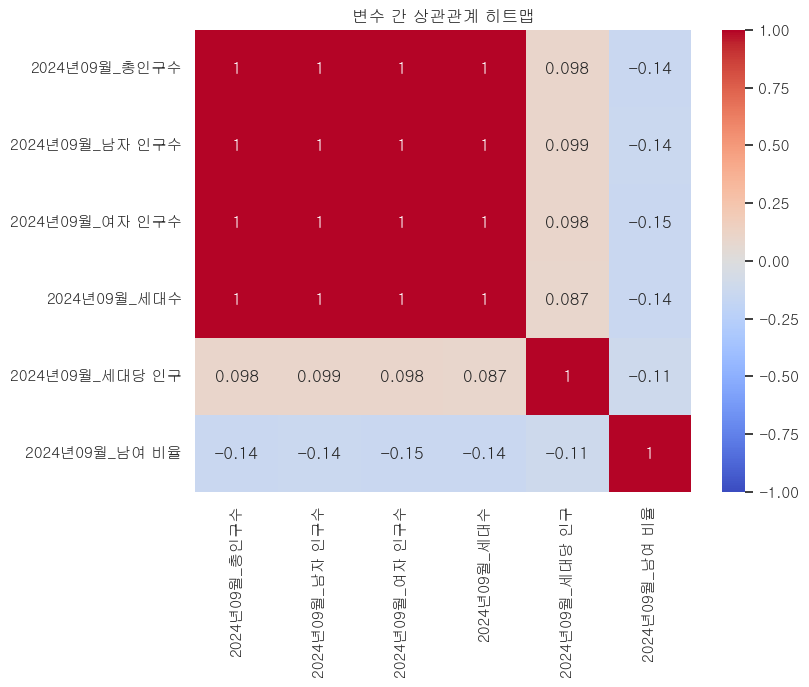

In [305]:
# 상관관계 히트맵
# 변수 간 상관관계 계산
corr_matrix = heatmap_df.corr()

# 상관관계 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('변수 간 상관관계 히트맵')
plt.show()

- 총 인구수, 남자 인구수, 여자 인구수, 세대수는 강한 양의 상관관계(1)이 나타나며, 인구가 많은 지역일수록 남녀 인구와 세대수가 많다는 것을 알 수 있다.
- 세대당 인구수는 0.098, 0.087이라는 매우 약한 상관관계를 가져서, 다른 변수와 거의 관련이 없는 것을 알 수 있다. 세대당 인구수가 지역의 전체 인구 규모나 세대수와 관련이 없음(독립적)을 알 수 있다.
- 남녀 비율은 다른 변수들과 약한 음의 상관관계를 가진다. 남녀 비율이 낮을수록 남자 인구가 상대적으로 적은 경향이며, 남녀 비율이 큰 변수와 밀접한 연관성은 없다. 따라서, 남녀 비율이 인구수와 세대수에 큰 영향을 미치지 않는다는 것을 알 수 있다.

## 상자그림

### 지역별 세대당 인구수

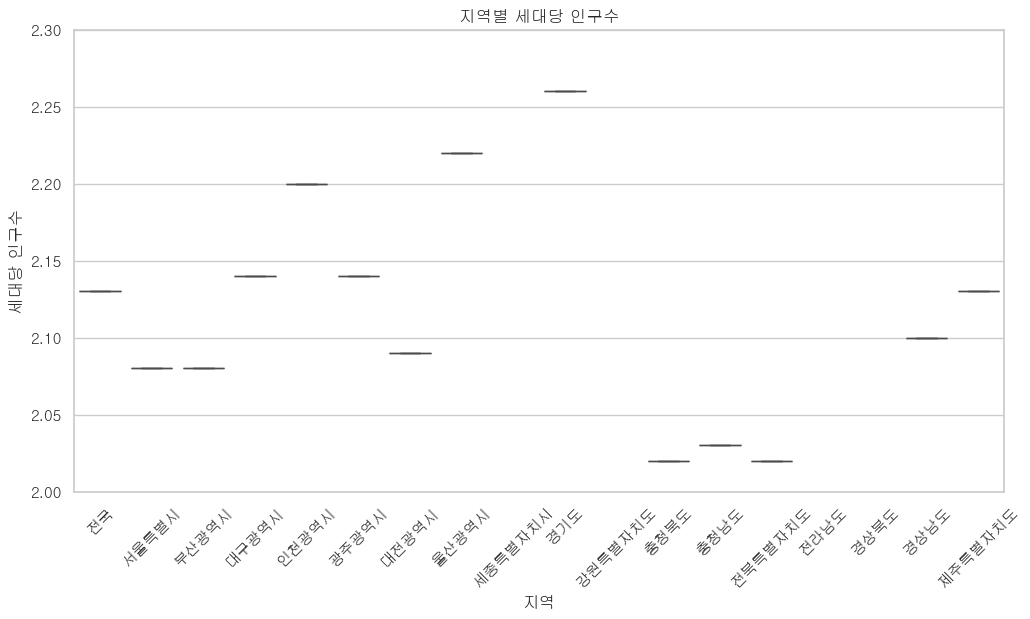

In [326]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x='행정구역', y='2024년09월_세대당 인구')
plt.ylim(2.0, 2.3)  # y축 범위를 2.0에서 2.3으로 조정
plt.xticks(rotation=45)
plt.xlabel('지역')
plt.ylabel('세대당 인구수')
plt.title('지역별 세대당 인구수')
plt.show()

- 대부분의 지역에서 세대당 인구수는 2.0에서 2.2 사이에 분포하고 있다. 각 지역의 평균 세대당 인구수가 비슷한 수준인 것을 알 수 있는데, 일부 지역에서는 세대당 인구수가 약간 더 높은 값을 가지며, 특히 세종 특별자치시가 다른 지역보다 상대적으로 높은 세대당 인구수를 보여준다.
- 이상치는 크게 눈에 띄는 지역은 없다.
- 중앙값은 그래프상에 세종특별자치시가 높게 보이긴 하지만 수치상 지역별 크게 차이가 나진 않는다.

# 5. 분석 결과

1. 세대당 인구수의 지역별 차이
- 세대당 인구수의 지역별 차이는 2.0 ~ 2.3사이로 분포하며, 전체적으로 비슷한 수준의 가족 구성 규모를 유지하고 있다.
- 대도시(서울, 부산, 대구)에서는 세대당 인구수가 약간 낮은 경향을 보이며, 1인 가구나 소규모 가구의 비율이 높을 가능성을 보았다. 일부 도 지역 및 세종시는 가족 단위 거주가 많아 세대당 인구수가 높은 특징을 보입니다.

2. 남녀 비율
- 대부분의 지역에서 남녀 비율은 1에 가깝게 분포하고 있어, 남  